In [1]:
import numpy as np
import matplotlib.pyplot as plt

def myplot(x_0, x_1, t, epsilon = None, name = "out.png"):
    
    n = x_0.shape[0]

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    plt.scatter(x_0[:, 0], x_0[:, 1], label = "Group 0")
    plt.scatter(x_1[:, 0], x_1[:, 1], label = "Group 1")
    plt.scatter(x_0[:, 0] + t[0], x_0[:, 1] + t[1], label = "Transformed Group 0")
  
    if epsilon is not None:
        for i in range(n):
            ball = plt.Circle((x_0[i, 0], x_0[i, 1]), epsilon, color = "red", fill = False, alpha = 0.1)
            ax.add_patch(ball)
            
            ball = plt.Circle((x_0[i, 0] + t[0], x_0[i, 1] + t[1]), epsilon, color = "red", fill = False, alpha = 0.1)
            ax.add_patch(ball)

            ball = plt.Circle((x_1[i, 0], x_1[i, 1]), epsilon, color = "red", fill = False, alpha = 0.1)
            ax.add_patch(ball)

    plt.axis('scaled')

    plt.legend(loc='upper left')
    
    plt.savefig(name)
    plt.show()
    plt.close()
    


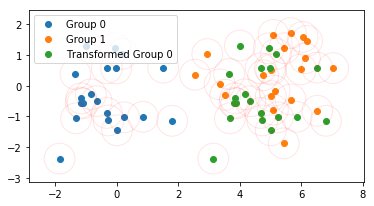

In [2]:
# Generate data of the same scale

n = 20

x_0 = np.random.normal(loc = 0.0, scale = 1.0, size = (n, 2))
x_1 = np.random.normal(loc = (5.0, 0.0), scale = 1.0, size = (n, 2))

myplot(x_0, x_1, [5, 0], epsilon = 0.5, name = "3-Good.png")

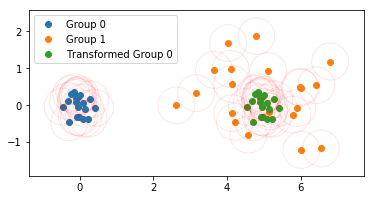

In [3]:
# Generate data of the different scale

n = 20

x_0 = np.random.normal(loc = 0.0, scale = 0.25, size = (n, 2))
x_1 = np.random.normal(loc = (5.0, 0.0), scale = 1.0, size = (n, 2))

myplot(x_0, x_1, t = [5, 0], epsilon = 0.5, name = "3-Bad.png")